##### **1. BUSINESS CONTEXT**

##### **1.1. Business Problem**

Beberapa faktor utama telah mendorong pasar mobil bekas di Arab Saudi selama sepuluh tahun terakhir, termasuk peningkatan populasi, pendapatan yang lebih tinggi, dan perubahan preferensi masyarakat terhadap transportasi pribadi. Sementara pemerintah berupaya untuk mendiversifikasi ekonominya dan secara bertahap mengurangi ketergantungannya pada minyak, sektor otomotif muncul sebagai salah satu sektor utama untuk investasi. Platform online telah merevolusi cara membeli dan menjual mobil, dengan peningkatan besar dalam transaksi digital. Semua ini membuat pasar lebih mudah diakses, menciptakan peluang bagi pembeli untuk membandingkan harga dan fitur, sehingga membuat pasar menjadi lebih transparan dan kompetitif di sisi penjual.

Lingkungan regulasi juga sedang mengalami perubahan yang mendukung pertumbuhan pasar mobil bekas. Peningkatan dalam perlindungan konsumen dan kualitas kendaraan menjadi lebih rutin, dengan proses inspeksi dan sertifikasi yang lebih ketat. Ini adalah perkembangan penting dalam membangun kepercayaan konsumen karena pembeli semakin selektif dalam memilih mobil yang akan mereka beli. Tren lain yang muncul di pasar adalah keberlanjutan, di mana semakin banyak orang mempertimbangkan kendaraan bekas sebagai cara untuk mengurangi jejak ekologis mereka. Intinya, seiring dengan pesatnya pertumbuhan pasar mobil bekas, dinamika di antara para pemangku kepentingan—baik melalui bentuk dealer atau situs web online—juga harus berubah jika mereka ingin memaksimalkan peluang yang muncul.


##### **1.2. Objective**

Analisis ini bertujuan untuk mengembangkan model prediktif berdasarkan berbagai faktor yang dapat secara akurat memprediksi harga mobil bekas di Arab Saudi. Dengan menawarkan prediksi harga yang andal, model ini akan membantu pembeli dan penjual dalam membuat keputusan yang lebih baik, sehingga meningkatkan efisiensi dan transparansi di pasar mobil bekas.

##### **1.3. Analytical Approach**

Untuk mengevaluasi kinerja model regresi, saya akan menggunakan metrik-metrik berikut:

- Mean Absolute Error (MAE): menunjukkan rata-rata seberapa jauh prediksi harga dari harga sebenarnya. Semakin rendah MAE, semakin baik.

- Mean Squared Error (RMSE): mirip dengan MAE tetapi kesalahan yang terjadi dikuadratkan sebelum dirata-rata. Ini berarti kesalahan yang lebih besar dihukum lebih berat. sehingga semakin rendah RMSE akansemakin baik.

- Adjusted R-squared (Adj_R²): Metrik ini menunjukkan persentase variasi dalam harga mobil sebenarnya yang dijelaskan oleh fitur, sambil menghukum penambahan fitur yang mungkin tidak terlalu berguna. Adjusted R² yang lebih tinggi (mendekati 1) berarti model akan lebih baik dalam menjelaskan perbedaan harga mobil dengan mempertimbangkan kompleksitas model.

- Mean Absolute Percentage Error (MAPE): Ini adalah cara lain untuk mengukur kesalahan, tetapi alih-alih hanya melihat selisih harga, ia menyatakannya sebagai persentase dari harga sebenarnya. Ini bisa berguna saat berhadapan dengan rentang harga mobil (seperti di bawah SAR 300.000) karena menghindari hukuman yang lebih besar pada model yang memprediksi mobil dengan harga lebih tinggi yang memiliki kesalahan absolut lebih besar. Semakin rendah MAPE, semakin baik.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



from scipy import stats

In [2]:
df = pd.read_csv('./data_saudi_used_cars.csv')

##### **2. DATA UNDERSTANDING**

Dataset ini merupakan kumpulan data mobil bekas yang dikumpulkan dari syarah.com. Setiap baris mewakili satu mobil bekas. Informasi lain yang berkaitan dengan setiap mobil mencakup `type`, `make`, `year`, `origin`,`options`, `engine_size`, `gear_type`, `mileage`, `region`, `price`

In [3]:
df.head()

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
0,Corolla,Abha,Toyota,Manual,Saudi,Standard,2013,1.4,421000,True,0
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,False,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,False,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,False,42000
4,FJ,Riyadh,Toyota,Automatic,Saudi,Full,2020,4.0,49000,True,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5624 entries, 0 to 5623
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type         5624 non-null   object 
 1   Region       5624 non-null   object 
 2   Make         5624 non-null   object 
 3   Gear_Type    5624 non-null   object 
 4   Origin       5624 non-null   object 
 5   Options      5624 non-null   object 
 6   Year         5624 non-null   int64  
 7   Engine_Size  5624 non-null   float64
 8   Mileage      5624 non-null   int64  
 9   Negotiable   5624 non-null   bool   
 10  Price        5624 non-null   int64  
dtypes: bool(1), float64(1), int64(3), object(6)
memory usage: 445.0+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,5624.0,2014.101885,5.791606,1963.0,2012.0,2016.0,2018.0,2022.0
Engine_Size,5624.0,3.295430,1.515108,1.0,2.0,3.0,4.5,9.0
Mileage,5624.0,150923.375000,382835.963005,100.0,38000.0,103000.0,196000.0,20000000.0
Price,5624.0,53074.058144,70155.340614,0.0,0.0,36500.0,72932.5,850000.0


In [6]:
df.describe(include='object').T

,count,unique,top,freq
Type,5624,347,Land Cruiser,269
Region,5624,27,Riyadh,2272
Make,5624,58,Toyota,1431
Gear_Type,5624,2,Automatic,4875
Origin,5624,4,Saudi,4188
Options,5624,3,Full,2233


Ringkasan :
- Dataset terdiri dari 10 kolom dengan jumlah baris sebanyak 5.624 tanpa nilai yang hilang (non-null).

- Ditemukan anomali di mana harga mobil tercatat sebagai 0. Kami akan melakukan pemeriksaan lebih lanjut untuk ini.

- Ada kemungkinan adanya outlier pada kolom tahun, harga, dan jarak tempuh, karena nilai maksimum jauh dari nilai median dan rata-rata. Penanganan outlier ini akan disesuaikan dan diasumsikan berdasarkan konteks bisnis mobil bekas di Arab Saudi.

##### **2.1. Data Distribution**

In [7]:
numerical_cols = df.select_dtypes('number').columns

numerical_cols

Index(['Year', 'Engine_Size', 'Mileage', 'Price'], dtype='object')

In [8]:
categorical_cols = df.select_dtypes('object').columns

categorical_cols

Index(['Type', 'Region', 'Make', 'Gear_Type', 'Origin', 'Options'], dtype='object')

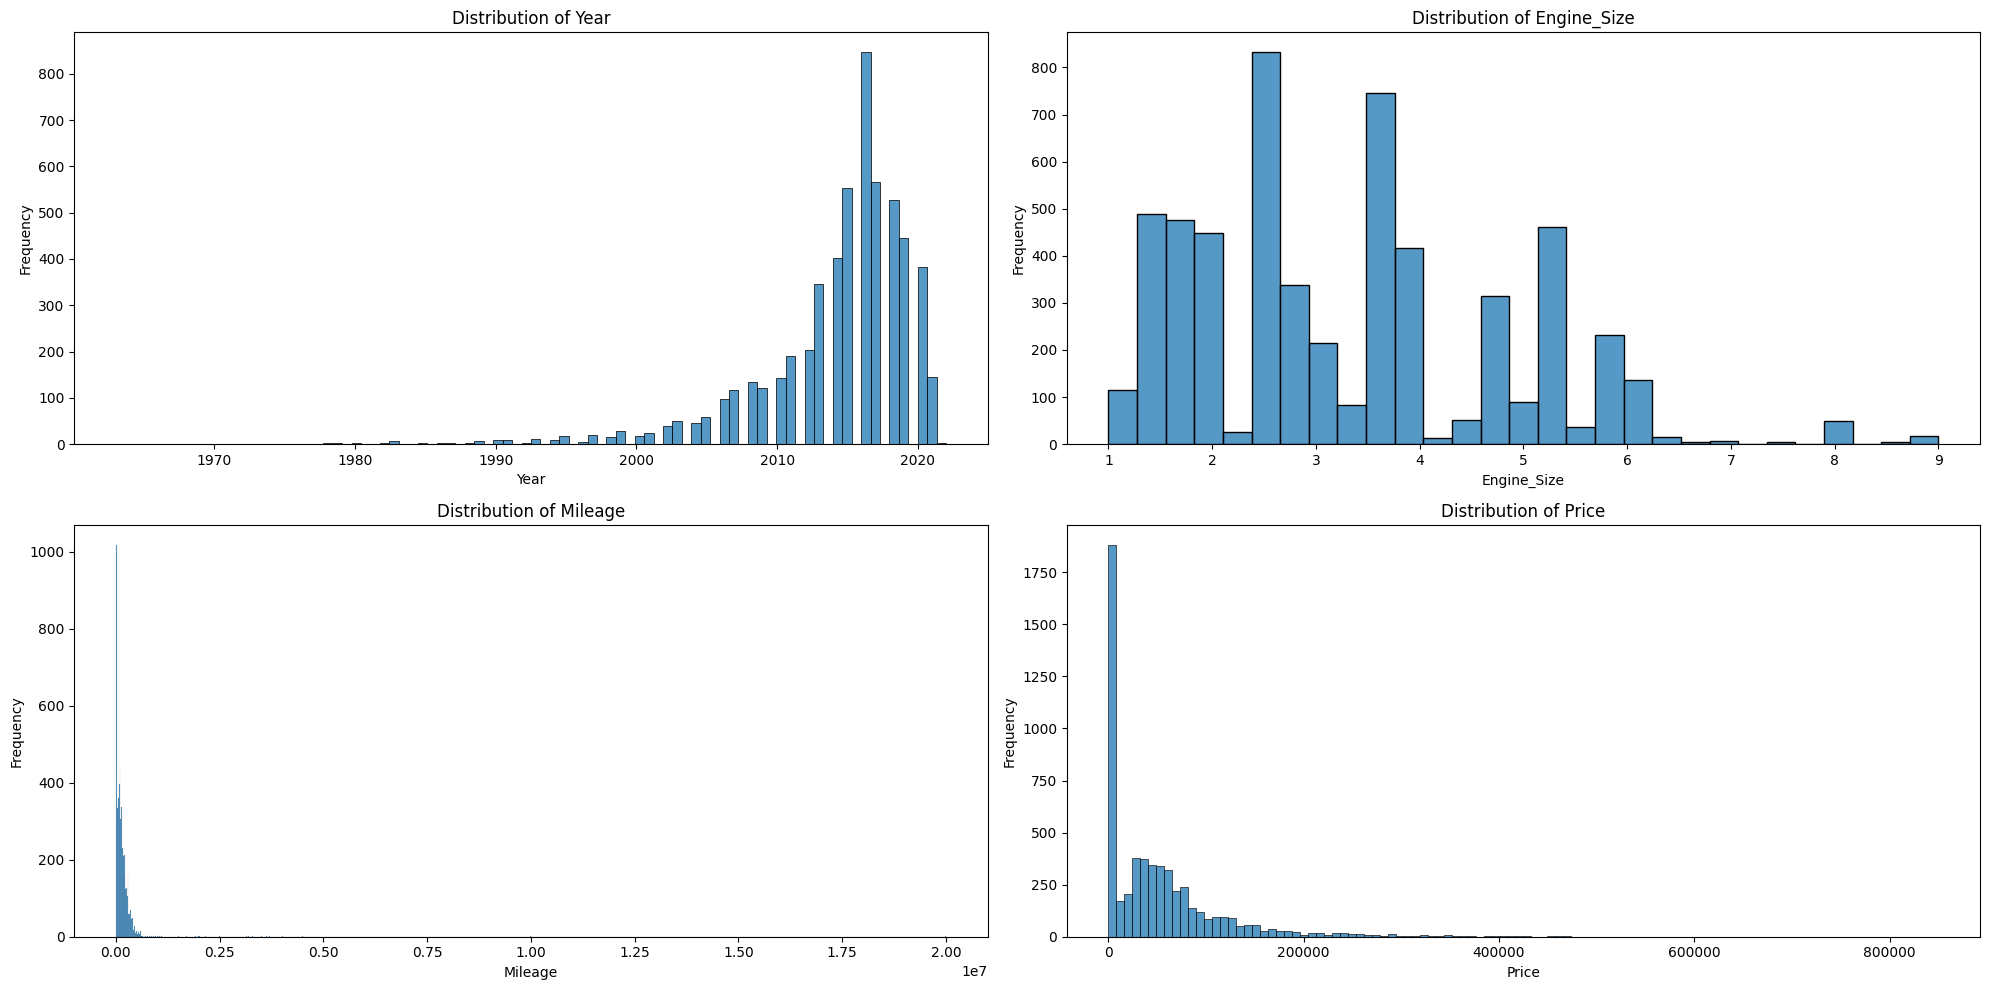

In [9]:
plt.figure(figsize=(20,10))

for index, col in enumerate(numerical_cols, 1) :
    plt.subplot(2, 2, index)
    sns.histplot(df[col])
    plt.title(f'Distribution of {col}')
    plt.xlabel(f'{col}')
    plt.ylabel('Frequency')
    
plt.tight_layout()
plt.show()

In [10]:
distribution_data = {}

for col in numerical_cols :
    shapiro_stats, shapiro_pvalue = stats.shapiro(df[col])
    ks_stats, ks_pvalue = stats.kstest(df[col], 'norm')
    
    distribution_data[col] = {
        'shapiro_pvalue': shapiro_pvalue,
        'ks_pvalue' : ks_pvalue
    }
    
distribution_data

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5624.
  res = hypotest_fun_out(*samples, **kwds)


{'Year': {'shapiro_pvalue': 8.759499557740467e-64, 'ks_pvalue': 0.0},
 'Engine_Size': {'shapiro_pvalue': 1.1949814453363754e-43, 'ks_pvalue': 0.0},
 'Mileage': {'shapiro_pvalue': 9.648936382396995e-94, 'ks_pvalue': 0.0},
 'Price': {'shapiro_pvalue': 6.126504991465864e-71, 'ks_pvalue': 0.0}}

In [11]:
for index, col in enumerate(numerical_cols) : 
    print(f'{index+1}.{col}')
    if distribution_data[col]['shapiro_pvalue'] < 0.05 : 
        print("We assume data is not normal distribution")
    else :
        print("We assume data is normal distribution")
        
    if distribution_data[col]['ks_pvalue'] < 0.05 : 
        print("We assume data is not normal distribution \n")
    else :
        print("We assume data is normal distribution \n")

1.Year
We assume data is not normal distribution
We assume data is not normal distribution 

2.Engine_Size
We assume data is not normal distribution
We assume data is not normal distribution 

3.Mileage
We assume data is not normal distribution
We assume data is not normal distribution 

4.Price
We assume data is not normal distribution
We assume data is not normal distribution 



#### **2.2. Data Correlation**

    2.2.1 Numerical Variable

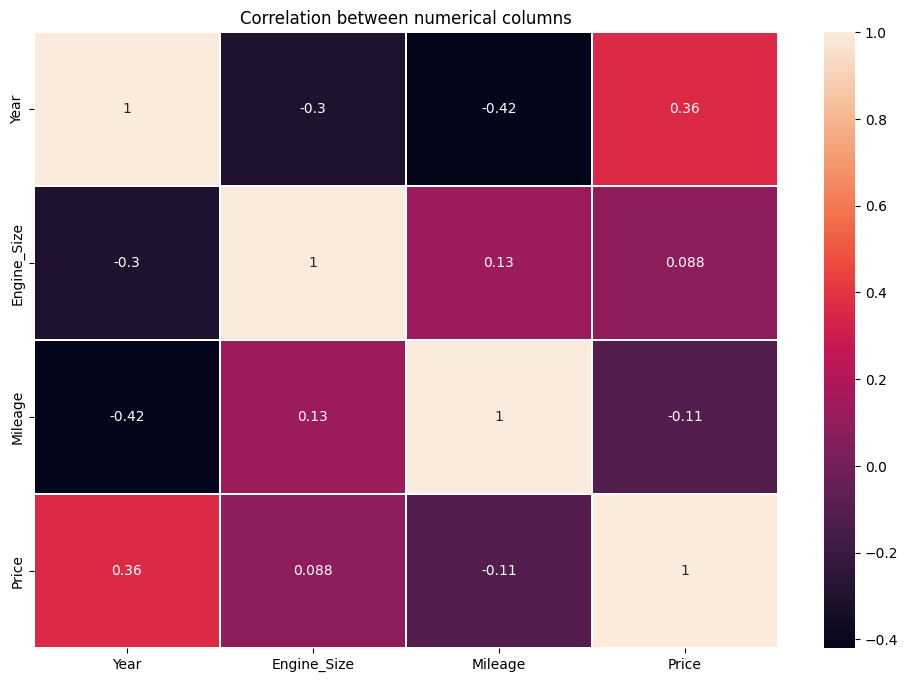

In [12]:
corr = df[numerical_cols].corr('spearman')

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, linewidths=0.1)
plt.title('Correlation between numerical columns')
plt.show()

- `Year` memiliki korelasi sedang terhadap `Price`, di mana semakin tinggi tahun pembuatan mobil, semakin tinggi pula harga yang dipatok.

    2.2.2 Categorical Variable

In [13]:
from scipy.stats import f_oneway

# Fungsi untuk melakukan uji ANOVA
def perform_anova(df, column):
    groups = [df['Price'][df[column] == category] for category in df[column].unique()]
    f_stat, p_value = f_oneway(*groups)
    return f_stat, p_value


for index, var in enumerate(categorical_cols):
    f_stat, p_value = perform_anova(df, var)

    if p_value < 0.05 : 
        print(f'{index + 1}. {var} has no significant effect to price.')
    else : 
        print(f'{index + 1}. {var} has significant effect to price.')

1. Type has no significant effect to price.
2. Region has no significant effect to price.
3. Make has no significant effect to price.
4. Gear_Type has no significant effect to price.
5. Origin has no significant effect to price.
6. Options has no significant effect to price.


##### **3. DATA PREPARATION AND CLEANING**

##### **3.1. Checking Negative Values**

In [14]:
pd.DataFrame({
    'column' : df.columns.values,
    'type' : df.dtypes.values,
    'null_value' : df.isnull().sum().values,
    'negative_value' : [True if df[i].dtypes == int and df[i].any() < 0 else False for i in df.columns],
    'n_unique' : [df[i].nunique() for i in df.columns],
    'sample_unique' : [df[i].unique()[:4] for i in df.columns]
})

,column,type,null_value,negative_value,n_unique,sample_unique
0,Type,object,0,False,347,"[Corolla, Yukon, Range Rover, Optima]"
1,Region,object,0,False,27,"[Abha, Riyadh, Hafar Al-Batin, Aseer]"
2,Make,object,0,False,58,"[Toyota, GMC, Land Rover, Kia]"
3,Gear_Type,object,0,False,2,"[Manual, Automatic]"
4,Origin,object,0,False,4,"[Saudi, Gulf Arabic, Other, Unknown]"
5,Options,object,0,False,3,"[Standard, Full, Semi Full]"
6,Year,int64,0,False,50,"[2013, 2014, 2015, 2020]"
7,Engine_Size,float64,0,False,71,"[1.4, 8.0, 5.0, 2.4]"
8,Mileage,int64,0,False,1716,"[421000, 80000, 140000, 220000]"
9,Negotiable,bool,0,False,2,"[True, False]"


##### **3.2. Duplicated Data**

In [15]:
df.duplicated().sum()

4

In [16]:
df.iloc[df[df.duplicated() == True].index]

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
953,Rio,Riyadh,Kia,Automatic,Saudi,Standard,2016,1.4,270000,False,25000
4646,Sonata,Jeddah,Hyundai,Automatic,Saudi,Standard,2020,2.4,100,False,72910
4933,Tucson,Dammam,Hyundai,Automatic,Saudi,Standard,2016,2.0,155000,False,45000
5267,Camry,Riyadh,Toyota,Automatic,Saudi,Full,2013,2.5,185000,True,0


In [17]:
df.drop_duplicates(inplace=True)

df.duplicated().sum()

0

##### **3.3. Anomalies and Unnecessary Column**

In [18]:
deleted_index1 = df[df['Origin'] == 'Unknown'].index

len(deleted_index1)

61

In [19]:
df.drop(index=deleted_index1, inplace=True)

In [20]:
deleted_index2 = df[df['Price'] == 0].index

len(deleted_index2)

1751

In [21]:
df.drop(index=deleted_index2, inplace=True)

In [22]:
df.drop(columns='Negotiable',inplace=True)

df.head()

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,42000
5,CX3,Abha,Mazda,Automatic,Saudi,Semi Full,2019,2.0,25000,58000
6,Cayenne S,Riyadh,Porsche,Automatic,Saudi,Full,2012,4.8,189000,85000


In [23]:
df.reset_index(drop=True, inplace=True)

##### **3.4. Checking and Handling Outliers**

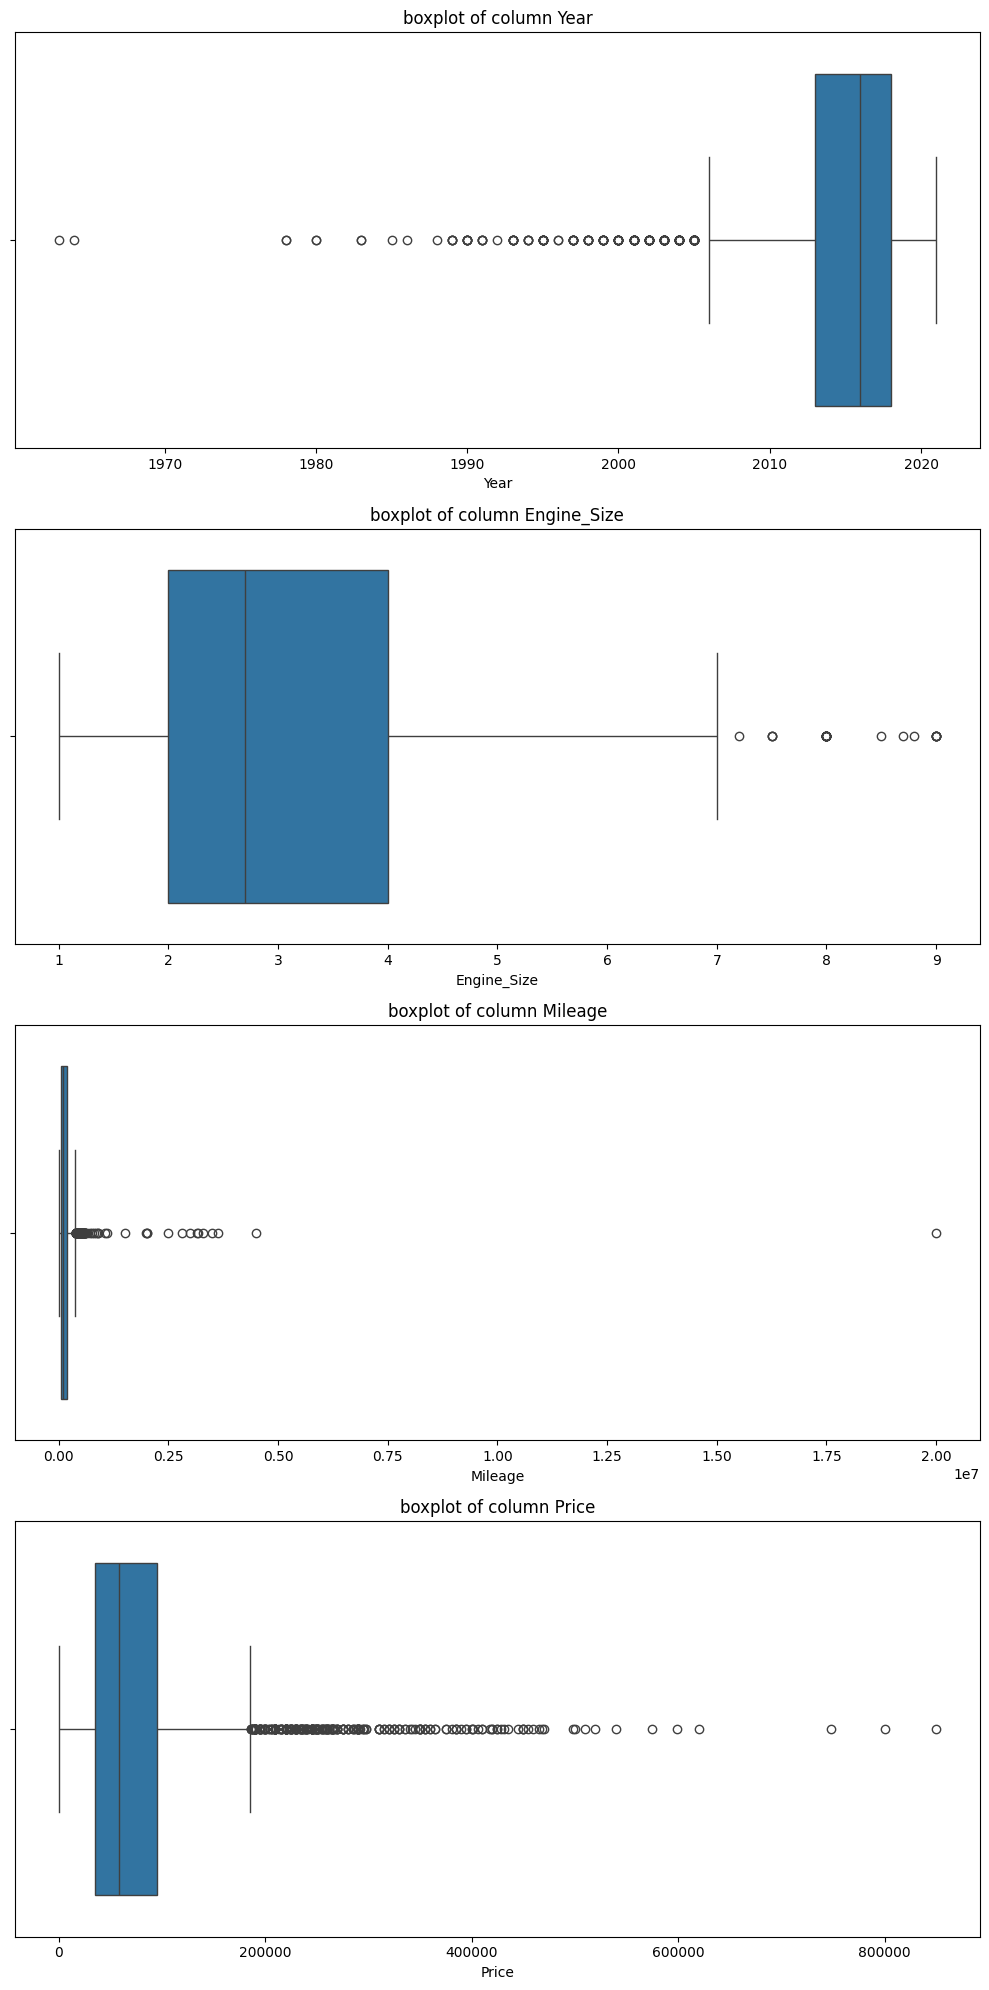

In [24]:
# checking outliers using boxplot

plt.figure(figsize=(10,20))
for index, col in enumerate(numerical_cols,1) :
    plt.subplot(4, 1, index) 
    sns.boxplot(data=df, x=df[col])
    plt.title(f'boxplot of column {col}')

plt.tight_layout()
plt.show()

In [25]:
def outliers_cal(df, col) :
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    
    return outliers, lower_bound, upper_bound


In [26]:
outliers_data = []

for index, col in enumerate(numerical_cols) : 
    outliers, lower_bound, upper_bound = outliers_cal(df, col)
    
    total_outliers = len(outliers)
    percentage_outliers = total_outliers / len(df) * 100
    
    outliers_data.append([col, total_outliers, percentage_outliers, lower_bound, upper_bound])

In [27]:
pd.DataFrame(outliers_data, columns='column total_outlier percentage lower_bound upper_bound'.split())

,column,total_outlier,percentage,lower_bound,upper_bound
0,Year,182,4.779412,2005.50,2025.50
1,Engine_Size,30,0.787815,-1.00,7.00
2,Mileage,130,3.413866,-153290.25,383483.75
3,Price,253,6.643908,-55000.00,185000.00


for the outliers i will handle it based on reference from syarah.com as below 

**Price, Mileage and Year Threshold by Website Syarah.com** <br><br> 
 <br>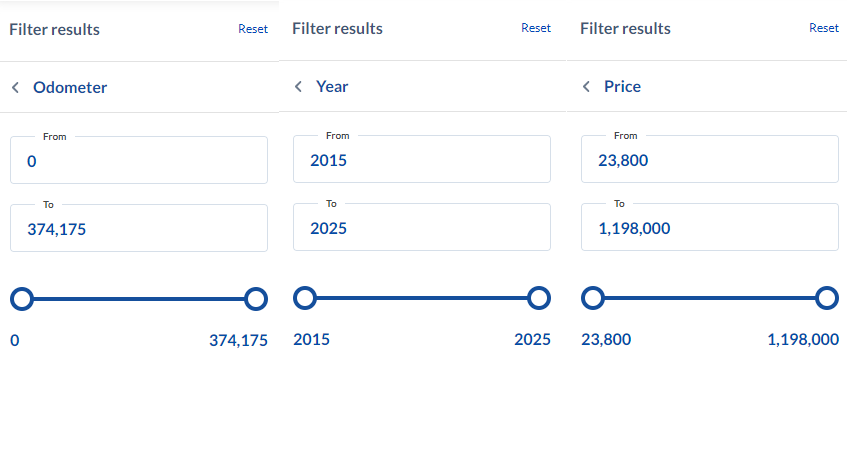


- Referensi `Year` maksimum adalah perbedaan 10 tahun, jadi saya akan menghapus mobil dengan `Year` lebih dari 10 tahun berdasarkan `Year` maksimum mobil dalam dataset. Berdasarkan dataset, nilai `Year` maksimum adalah 2022, sehingga ambang batasnya adalah: 2012 - 2022.

- Untuk `Engine_size`, ambang batas akan mengikuti nilai batas atas outlier yang ditetapkan, yaitu 6.5.

- Untuk `Mileage`, akan sesuai dengan informasi dari syarah.com, sehingga ambang batasnya adalah: 0 - 374.175.

- Untuk `Price`, juga akan sesuai dengan informasi dari syarah.com, sehingga ambang batasnya adalah: 23.800 - 1.198.000.

In [28]:
# defining the threshold based on Syarah.com
threshhold = (df['Price'] >= 23800) & (df['Price'] <= 1198000)& (df['Mileage'] >= 0) & (df['Mileage'] <= 374175) & (df['Year'] >= 2012) & (df['Engine_Size'] <= 6.5)

In [29]:
# Dataframe inside the threshold
df_threshold = df[threshhold]
df_threshold

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
1,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,260000
2,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,42000
3,CX3,Abha,Mazda,Automatic,Saudi,Semi Full,2019,2.0,25000,58000
4,Cayenne S,Riyadh,Porsche,Automatic,Saudi,Full,2012,4.8,189000,85000
5,Sonata,Riyadh,Hyundai,Automatic,Saudi,Full,2016,2.4,155,48000
...,...,...,...,...,...,...,...,...,...,...
3802,6,Jeddah,Mazda,Automatic,Saudi,Semi Full,2017,2.5,106000,56000
3803,CX9,Qassim,Mazda,Automatic,Saudi,Full,2020,2.0,9500,132000
3805,X-Trail,Jeddah,Nissan,Automatic,Saudi,Standard,2018,2.5,78794,68000
3806,Yukon,Dammam,GMC,Automatic,Saudi,Full,2016,5.3,48000,145000


In [30]:
# Access the dataframe outside the threshold
outside_threshold = df[~(threshhold)]
outside_threshold

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
0,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,120000
8,Land Cruiser,Riyadh,Toyota,Automatic,Saudi,Full,2011,4.6,79000,145000
9,LS,Dammam,Lexus,Automatic,Saudi,Full,2008,4.6,299000,38000
13,Sunny,Riyadh,Nissan,Manual,Saudi,Standard,2011,1.4,290,7000
16,Focus,Khobar,Ford,Automatic,Gulf Arabic,Standard,2014,1.6,98000,23000
...,...,...,...,...,...,...,...,...,...,...
3791,Corolla,Dammam,Toyota,Manual,Other,Standard,1997,1.3,32500,7000
3795,Land Cruiser,Al-Baha,Toyota,Automatic,Gulf Arabic,Full,2006,4.6,285,65000
3798,Land Cruiser 70,Taef,Toyota,Manual,Saudi,Full,2020,4.0,45000,2450
3800,Azera,Riyadh,Hyundai,Automatic,Other,Semi Full,2011,3.5,447,21000


In [31]:
# dropping the data outside the threshold 
df.drop(outside_threshold.index, inplace=True)
df.reset_index(drop=True, inplace=True)


In [32]:
outliers_data_after = []

for index, col in enumerate(numerical_cols) : 
    outliers, lower_bound, upper_bound = outliers_cal(df, col)
    
    total_outlier = len(outliers)
    
    outlier_percentage = round(total_outlier/len(df) * 100, 2)
    
    outliers_data_after.append([col, total_outlier, outlier_percentage, lower_bound, upper_bound])

In [33]:
pd.DataFrame(outliers_data_after, columns='column total_outlier percentage lower_bound upper_bound'.split())

,column,total_outlier,percentage,lower_bound,upper_bound
0,Year,0,0.00,2010.5,2022.5
1,Engine_Size,0,0.00,-0.7,6.5
2,Mileage,73,2.47,-105000.0,303000.0
3,Price,207,7.00,-50062.5,204437.5


In [34]:
df.shape

(2956, 10)

In [35]:
df.head()

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
0,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,260000
1,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,42000
2,CX3,Abha,Mazda,Automatic,Saudi,Semi Full,2019,2.0,25000,58000
3,Cayenne S,Riyadh,Porsche,Automatic,Saudi,Full,2012,4.8,189000,85000
4,Sonata,Riyadh,Hyundai,Automatic,Saudi,Full,2016,2.4,155,48000


In [36]:
df.to_csv('clean_data_used_saudi_cars.csv', index=False)

##### **3. EXPLORATORY DATA ANALYSIS**

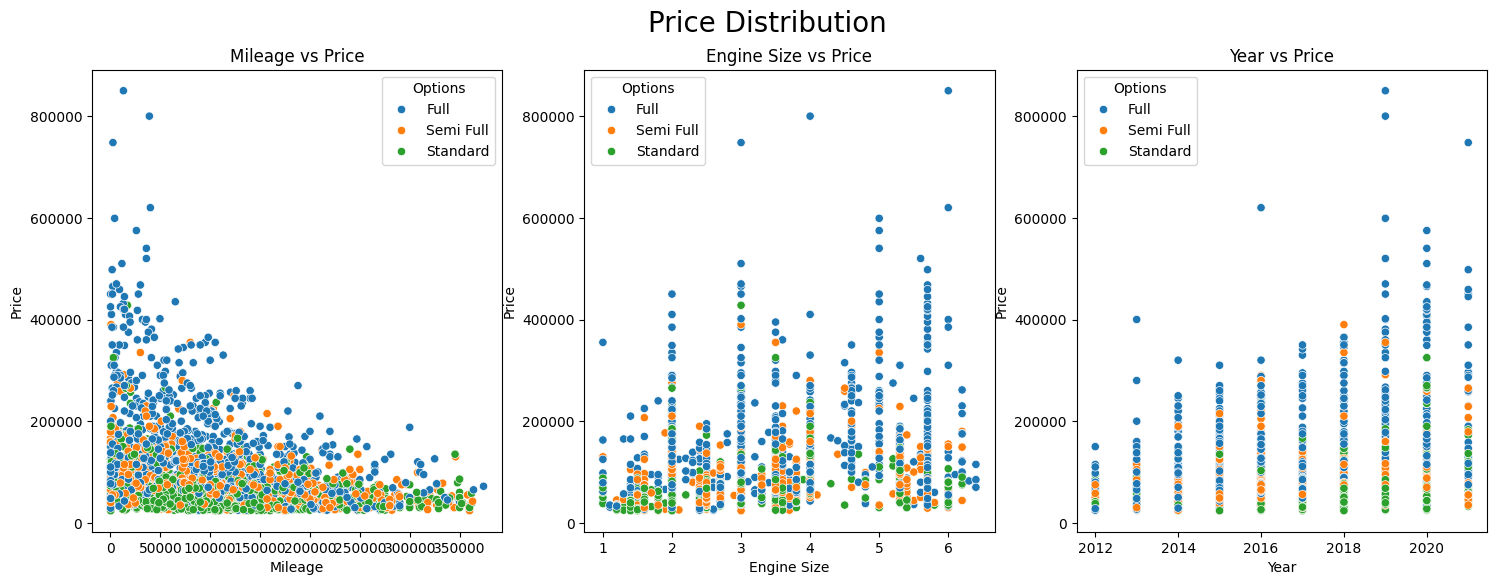

In [37]:

figure, axes = plt.subplots(1, 3, figsize=(18, 6))
figure.suptitle('Price Distribution', size=20)

sns.scatterplot(data=df, 
                x='Mileage', 
                y='Price',
                hue = 'Options', 
                ax=axes[0])
axes[0].set_xlabel('Mileage')
axes[0].set_ylabel('Price')
axes[0].set_title('Mileage vs Price')


sns.scatterplot(data=df, 
                x='Engine_Size', 
                y='Price', 
                hue = 'Options',
                ax=axes[1])
axes[1].set_xlabel('Engine Size')
axes[1].set_ylabel('Price')
axes[1].set_title('Engine Size vs Price')


sns.scatterplot(data=df, 
                x='Year', 
                y='Price', 
                hue = 'Options',
                ax=axes[2])
axes[2].set_xlabel('Year')
axes[2].set_ylabel('Price')
axes[2].set_title('Year vs Price')

plt.show()

- Terdapat korelasi negatif yang signifikan antara `mileage` dan `price`, yang menunjukkan bahwa mobil dengan `mileage`lebih rendah umumnya memiliki `price`lebih tinggi. Mobil dengan `options` Full (titik merah) cenderung mempertahankan `price` yang lebih tinggi di berbagai rentang `mileage`dibandingkan dengan `Options` Semi Full (titik biru) dan Standard (titik ungu).

- Hubungan antara `engine_size` dan `price` menunjukkan variasi tertentu. `engine_size` yang lebih besar umumnya berkaitan dengan `price` yang lebih tinggi, terutama untuk mobil dengan `options` Full. Namun, terdapat outlier dengan `price` tinggi di semua jenis `options`, yang menunjukkan bahwa faktor lain selain `engine_size` mungkin secara signifikan mempengaruhi `price`.

- Terdapat korelasi positif yang jelas antara `year` dan `price` mobil. Mobil yang lebih baru (dari tahun 2016 ke atas) cenderung memiliki `price` yang lebih tinggi. Mobil dengan `options` full secara konsisten menunjukkan `price` yang lebih tinggi di semua tahun dibandingkan dengan `options` Semi Full dan Standard.

In [38]:
avg_price_type = df.groupby('Type')['Price'].mean().reset_index().sort_values(by='Price', ascending=False).head()

avg_price_type

,Type,Price
32,Bentayga,850000.0
126,Ghost,620000.0
86,Defender,450000.0
116,G,411250.0
248,Vanquish,400000.0


In [39]:
avg_price_region = df.groupby('Region')['Price'].mean().reset_index().sort_values(by='Price', ascending=False).head()

avg_price_region

,Region,Price
16,Makkah,101520.140000
25,Wadi Dawasir,101000.000000
24,Taef,101000.000000
9,Dammam,100677.515723
17,Najran,96125.000000


In [40]:
avg_price_make = df.groupby('Make')['Price'].mean().reset_index().sort_values(by='Price', ascending=False).head()

avg_price_make

,Make,Price
44,Rolls-Royce,620000.0
4,Bentley,580000.0
0,Aston Martin,400000.0
30,Land Rover,284290.0
42,Porsche,213800.0


In [41]:
avg_price_gear_type = df.groupby('Gear_Type')['Price'].mean().reset_index()

avg_price_gear_type

,Gear_Type,Price
0,Automatic,92459.734679
1,Manual,68324.614719


In [42]:
avg_price_origin = df.groupby('Origin')['Price'].mean().reset_index()

avg_price_origin 

,Origin,Price
0,Gulf Arabic,121483.486239
1,Other,116209.611538
2,Saudi,81661.267257


In [43]:
avg_price_options = df.groupby('Options')['Price'].mean().reset_index()

avg_price_options 

,Options,Price
0,Full,125982.294014
1,Semi Full,79563.141009
2,Standard,60284.211079


In [44]:
categorical_comparison = [avg_price_type, avg_price_region, avg_price_make, avg_price_gear_type, avg_price_origin, avg_price_options]


In [45]:
categorical_cols

Index(['Type', 'Region', 'Make', 'Gear_Type', 'Origin', 'Options'], dtype='object')

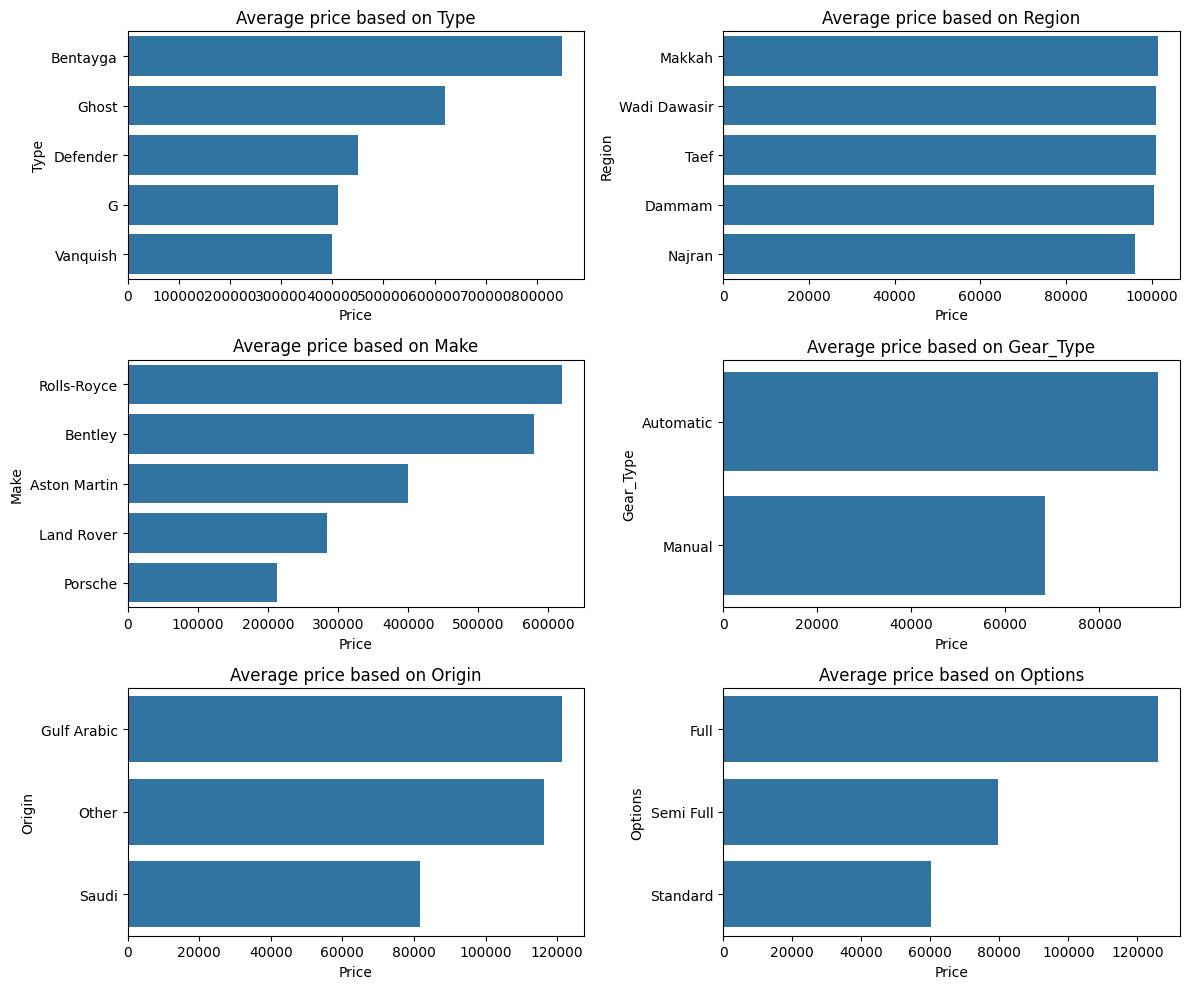

In [46]:
plt.figure(figsize=(12, 10))

for index, data in enumerate(categorical_comparison, 1):
    for col in categorical_cols:
        if col in data.columns:  # Check if column exists
            plt.subplot(3, 2, index)
            sns.barplot(data=data, y=col, x='Price')
            plt.title(f'Average price based on {col}')
        
plt.tight_layout()
plt.show()


##### **4. MODELING MACHINE LEARNING**

##### **4.1 Feature Engineering**

    4.1.1. Adding new feature

In [47]:
car_type_mapping = {
    'Range Rover': 'SUV', 'Optima': 'Sedan', 'CX3': 'SUV', 'Cayenne S': 'SUV', 'Sonata': 'Sedan', 'Avalon': 'Sedan',
    'C300': 'Sedan', 'FJ': 'SUV', 'Land Cruiser': 'SUV', 'Tucson': 'SUV', 'Pajero': 'SUV', 'Azera': 'Sedan', '5': 'Sedan',
    'Corolla': 'Sedan', 'Tahoe': 'SUV', 'A': 'Sedan', 'Expedition': 'SUV', 'Senta fe': 'SUV', 'Liberty': 'SUV', 'X': 'Sedan',
    'Land Cruiser Pickup': 'Pickup', 'VTC': 'Sedan', 'Malibu': 'Sedan', 'The 5': 'Sedan', 'Grand Cherokee': 'SUV', 'SL': 'Convertible',
    'Previa': 'Minivan', 'MKZ': 'Sedan', 'Datsun': 'Sedan', 'Hilux': 'Pickup', 'Yukon': 'SUV', 'GLC': 'SUV', '6': 'Sedan',
    'Innova': 'MPV', 'Navara': 'Pickup', 'G80': 'Sedan', 'Carnival': 'MPV', 'Camaro': 'Coupe', 'Accord': 'Sedan', 'Taurus': 'Sedan',
    'Camry': 'Sedan', 'Elantra': 'Sedan', 'Flex': 'SUV', 'Cerato': 'Sedan', 'Land Cruiser 70': 'SUV', 'Altima': 'Sedan', '3': 'Sedan',
    'Pick up': 'Pickup', 'Charger': 'Sedan', 'H6': 'SUV', 'Hiace': 'Van', 'Sunny': 'Sedan', 'Accent': 'Sedan', 'CX9': 'SUV',
    'Yaris': 'Hatchback', 'Sylvian Bus': 'Bus', 'ES': 'Sedan', 'Navigator': 'SUV', 'Sierra': 'Pickup', 'Patrol': 'SUV', 'The 7': 'Sedan',
    'Creta': 'SUV', 'CS35': 'SUV', 'Edge': 'SUV', 'LS': 'Sedan', 'The 3': 'Sedan', 'Sedona': 'Minivan', 'Prestige': 'Sedan', 
    'CLA': 'Sedan', 'Vanquish': 'Coupe', 'Cadenza': 'Sedan', 'Silverado': 'Pickup', 'Rio': 'Hatchback', 'X-Trail': 'SUV', 'C': 'Sedan',
    'S': 'Sedan', 'Seven': 'Sedan', 'Prado': 'SUV', 'CT-S': 'Sedan', 'LX': 'SUV', 'Impala': 'Sedan', 'QX': 'SUV', 'H1': 'Minivan',
    'Rav4': 'SUV', 'The M': 'Sedan', 'Genesis': 'Sedan', 'Fusion': 'Sedan', 'Traverse': 'SUV', 'Suburban': 'SUV', 'Furniture': 'Other',
    'Civic': 'Sedan', 'Echo Sport': 'SUV', 'Challenger': 'Coupe', 'Wrangler': 'SUV', 'Maxima': 'Sedan', 'A6': 'Sedan', 'CX5': 'SUV',
    'Mohave': 'SUV', 'Caprice': 'Sedan', 'Durango': 'SUV', 'Rush': 'SUV', 'Sentra': 'Sedan', 'Veloster': 'Hatchback', 'E': 'Sedan',
    'IS': 'Sedan', 'Vego': 'Pickup', 'Ciocca': 'Sedan', 'Q': 'SUV', 'F3': 'Sedan', 'Kona': 'SUV', 'Explorer': 'SUV', 'UX': 'SUV', 
    'Beetle': 'Hatchback', 'F150': 'Pickup', 'Van R': 'Van', 'Mustang': 'Coupe', 'CS35 Plus': 'SUV', 'APV': 'Minivan', 'Viano': 'Minivan',
    'Duster': 'SUV', 'RX': 'SUV', 'Platinum': 'SUV', 'Carenz': 'MPV', 'Avanza': 'MPV', 'Emgrand': 'Sedan', 'Dyna': 'Truck', 'Z': 'Coupe',
    'Odyssey': 'Minivan', 'Juke': 'SUV', 'Sportage': 'SUV', 'Spark': 'Hatchback', 'C200': 'Sedan', 'Attrage': 'Sedan', 'GS': 'Sedan',
    'X-Terra': 'SUV', 'CT5': 'Sedan', 'D-MAX': 'Pickup', 'KICKS': 'SUV', 'Gran Max': 'MPV', 'Cayman': 'Coupe', 'A8': 'Sedan',
    'Levante': 'SUV', 'G': 'SUV', 'Montero': 'SUV', '300': 'Sedan', 'A3': 'Sedan', 'Touareg': 'SUV', 'Cruze': 'Sedan',
    'Passat': 'Sedan', 'Delta': 'Sedan', 'GS3': 'SUV', 'Coupe': 'Coupe', 'Colorado': 'Pickup', 'Kaptiva': 'SUV', 'ML': 'SUV',
    'LF X60': 'SUV', 'Fluence': 'Sedan', 'Koleos': 'SUV', 'Pilot': 'SUV', 'L200': 'Pickup', 'Ranger': 'Pickup', 'Escalade': 'SUV',
    'A7': 'Sedan', 'Quattroporte': 'Sedan', 'Compass': 'SUV', 'Macan': 'SUV', 'Azkarra': 'SUV', 'GL': 'SUV', 'City': 'Sedan',
    'Sorento': 'SUV', 'RX5': 'SUV', 'CT6': 'Sedan', 'Tiggo': 'SUV', 'Q5': 'SUV', 'XJ': 'Sedan', 'Acadia': 'SUV', 'H2': 'SUV',
    'Ghost': 'Sedan', 'HS': 'SUV', 'Seltos': 'SUV', 'RX8': 'SUV', '3008': 'SUV', 'Victoria': 'Sedan', 'Suvana': 'SUV', 'Prius': 'Hatchback',
    'Eado': 'Sedan', 'EC7': 'Sedan', 'Dokker': 'Van', 'Royal': 'SUV', 'NX': 'SUV', 'Copper': 'SUV', 'CS75': 'SUV', 'F-Pace': 'SUV',
    'Coolray': 'SUV', 'CS85': 'SUV', 'CLS': 'Sedan', '360': 'Sedan', 'Lancer': 'Sedan', 'S300': 'Sedan', 'Ram': 'Pickup', 'Terrain': 'SUV',
    '500': 'Hatchback', 'Cherokee': 'SUV', '5008': 'SUV', 'Tiguan': 'SUV', 'Golf': 'Hatchback', 'CS95': 'SUV', 'S5': 'Sedan', '911': 'Coupe',
    'Pathfinder': 'SUV', 'Defender': 'SUV', 'Daily': 'Van', 'Cayenne': 'SUV', 'Mini Van': 'Van', 'Pegas': 'Sedan', 'Cores': 'SUV',
    'Grand Vitara': 'SUV', 'FX': 'SUV', 'Coaster': 'Bus', 'Discovery': 'SUV', 'Bentayga': 'SUV', 'Z370': 'Coupe', 'Other': 'Other',
    'Bus County': 'Bus', 'Stinger': 'Sedan', 'SRT': 'SUV', 'K5': 'Sedan', 'Armada': 'SUV', 'Blazer': 'SUV', 'CT4': 'Sedan', 'F Type': 'Coupe',
    'CC': 'Sedan', 'ASX': 'SUV', 'Carens': 'MPV', 'XT5': 'SUV', 'Tuscani': 'Coupe', '4Runner': 'SUV', 'ATS': 'Sedan', 'The 4': 'Sedan',
    'HRV': 'SUV', 'X7': 'SUV', 'GX': 'SUV', 'X40': 'SUV', 'ZS': 'SUV', 'G70': 'Sedan', 'Flying Spur': 'Sedan', 'Megane': 'Hatchback',
    'Power': 'Pickup', 'B50': 'Sedan', 'GLE': 'SUV', 'Van': 'Van', 'i40': 'Sedan', 'Bus Urvan': 'Bus', 'RC': 'Sedan', 'MKX': 'SUV', 
    'A5': 'Sedan', 'The 6': 'Sedan', 'Jetta': 'Sedan', 'CRV': 'SUV', 'Symbol': 'Sedan', 'Soul': 'SUV', 'Dzire': 'Sedan', 'Avante': 'Sedan',
    'XF': 'Sedan', 'Countryman': 'SUV', 'Prestige Plus': 'Sedan'
}

In [48]:
df['Model'] = df['Type'].map(car_type_mapping)

In [49]:
print(f'number of unique value : {df['Model'].nunique()}')

print(f'sample of unique value: {df['Model'].unique()}')

number of unique value : 12
sample of unique value: ['SUV' 'Sedan' 'Pickup' 'Convertible' 'Minivan' 'MPV' 'Coupe' 'Van'
 'Hatchback' 'Bus' 'Other' 'Truck' nan]


    4.1.2 Feature Selection

In [50]:
import statsmodels.api as sm
import category_encoders as ce


# preprocessing
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, KFold, cross_val_score, RandomizedSearchCV, GridSearchCV, cross_val_predict


# machine learning model 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost.sklearn import XGBRegressor


# metric evaluation
from sklearn.metrics import mean_absolute_error, r2_score, make_scorer,  mean_squared_error, mean_absolute_percentage_error


In [51]:
df.head()

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price,Model
0,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,260000,SUV
1,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,42000,Sedan
2,CX3,Abha,Mazda,Automatic,Saudi,Semi Full,2019,2.0,25000,58000,SUV
3,Cayenne S,Riyadh,Porsche,Automatic,Saudi,Full,2012,4.8,189000,85000,SUV
4,Sonata,Riyadh,Hyundai,Automatic,Saudi,Full,2016,2.4,155,48000,Sedan


In [52]:
X = df.drop('Price', axis=1)
y = df['Price']

random_value = 42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = random_value)

print(f'X_train : {X_train.shape}')
print(f'X_test : {X_test.shape}')

X_train : (2069, 10)
X_test : (887, 10)


    4.1.3 Feature Encoding and Scaling

In [53]:
df.columns

Index(['Type', 'Region', 'Make', 'Gear_Type', 'Origin', 'Options', 'Year',
       'Engine_Size', 'Mileage', 'Price', 'Model'],
      dtype='object')

In [54]:
onehot_column = ['Gear_Type']

binary_column = ['Model', 'Region', 'Origin', 'Options','Type', 'Make']

numerical_column = [col for col in numerical_cols if col != 'Price']

In [55]:
from sklearn.impute import SimpleImputer

In [56]:
one_hot_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

binary_transformer = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('binary', ce.BinaryEncoder())
])

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('numerical', numerical_transformer, numerical_column),
        ('onehot', one_hot_transformer, onehot_column),
        ('binary', binary_transformer, binary_column)
    ], remainder='passthrough'
)

In [57]:
X_train_transformed = preprocessor.fit_transform(X_train)

X_train_transformed_df = pd.DataFrame(X_train_transformed,columns=preprocessor.get_feature_names_out())

X_train_transformed_df 

,numerical__Year,numerical__Engine_Size,numerical__Mileage,onehot__Gear_Type_Automatic,onehot__Gear_Type_Manual,binary__0_0,binary__0_1,binary__0_2,binary__0_3,binary__1_0,...,binary__4_4,binary__4_5,binary__4_6,binary__4_7,binary__5_0,binary__5_1,binary__5_2,binary__5_3,binary__5_4,binary__5_5
0,0.666667,-0.705882,-0.651850,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.000000,0.000000,0.061551,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.000000,0.176471,-0.602309,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
3,0.333333,-0.176471,-0.049165,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-0.666667,0.529412,0.477701,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2064,-0.333333,0.470588,0.101184,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
2065,-0.333333,0.764706,-0.236691,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2066,-1.666667,1.529412,0.824493,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2067,0.666667,1.117647,-0.305058,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


##### **4.2. Model Selection**

    4.2.1. Multiple Linear Regresion using OLS Method 

Pada bagian ini, akan dilakukan pemeriksaan dataset untuk mengamati hubungan antara variabel dependen dan independen guna menentukan apakah mereka menunjukkan hubungan linear atau tidak, dengan melakukan analisis residual untuk memastikan bahwa asumsi linearitas terpenuhi, yang mencakup:

Homoscedasticity: Varians residual harus konstan di semua level variabel independen.

Normalitas: Residual harus mengikuti distribusi normal.

Jika hasilnya tidak menunjukkan hubungan linear, maka kita akan beralih ke metode non-linear untuk prediksi model.

In [58]:
X_train_transformed_df.reset_index(drop=True, inplace=True)

y_train.reset_index(drop=True, inplace=True)

In [59]:
X_train_linear_regression = sm.add_constant(X_train_transformed_df)

result_ols = sm.OLS(y_train, X_train_linear_regression).fit()

print(result_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     98.59
Date:                Wed, 02 Oct 2024   Prob (F-statistic):               0.00
Time:                        00:12:10   Log-Likelihood:                -25170.
No. Observations:                2069   AIC:                         5.040e+04
Df Residuals:                    2037   BIC:                         5.058e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [60]:
fitted_values = result_ols.fittedvalues  # Predicted values
residuals = result_ols.resid  

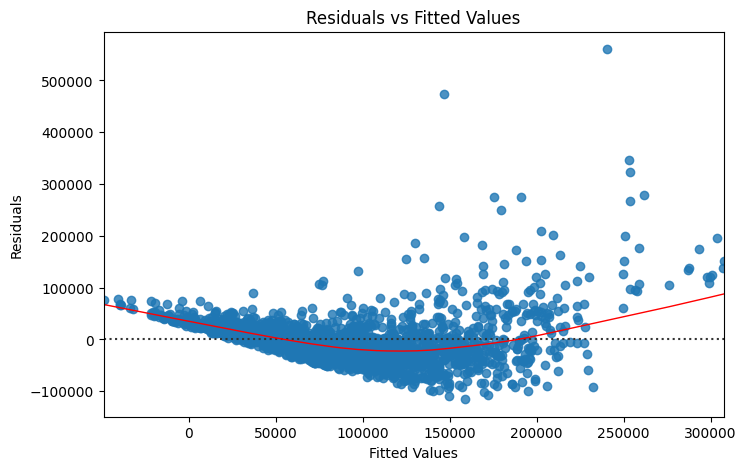

In [61]:
# Plot residuals vs fitted values
plt.figure(figsize=(8, 5))
sns.residplot(x=fitted_values, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

Hasil visualisasi analisis residual menunjukkan bahwa distribusi plot residual terhadap nilai prediksi tidak tersebar secara uniform di sepanjang garis nol. Sebaliknya, residual melebar atau meningkat, yang mengindikasikan adanya heteroskedastisitas, di mana varians residual meningkat seiring dengan nilai prediksi.

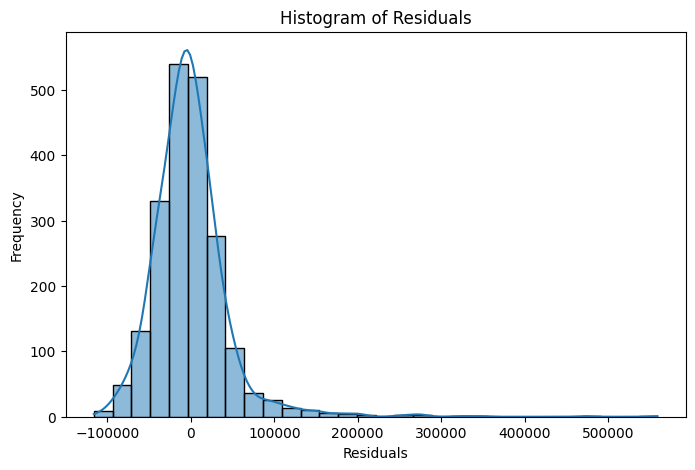

In [62]:
#  Histogram of residuals
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, bins=30)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


Grafik distribusi residual menunjukkan bahwa distribusinya tidak normal dan membentuk pola miring ke kanan (*right-skewed distribution*), di mana lebih banyak nilai residual terletak di sebelah kiri rata-rata, dengan ekor yang panjang di sisi kanan.

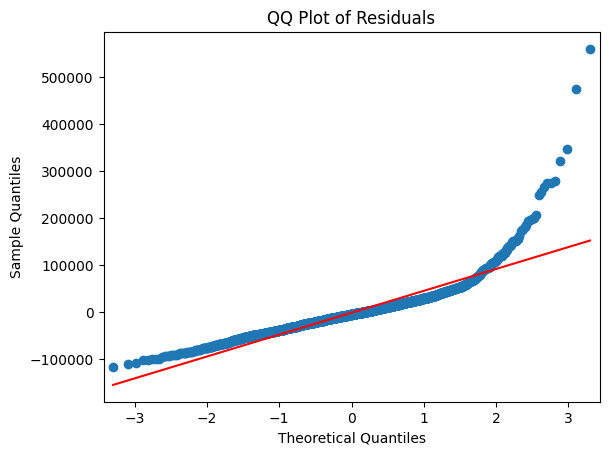

In [63]:
# Check normality of residuals with QQ plot
sm.qqplot(residuals, line='s')
plt.title('QQ Plot of Residuals')
plt.show()


Plot QQ dari residual menunjukkan bahwa titik-titik data tidak mengikuti garis merah, yang mengindikasikan bahwa residual tidak terdistribusi secara normal.


Berdasarkan hasil analisis residual, penggunaan metode regresi linear tidak cocok untuk memprediksi nilai mobil bekas, sehingga pendekatan non-linear, seperti model berbasis pohon, akan lebih tepat.

##### **4.3. Model Benchmark and Evaluation**  

Pada tahap ini akan dilakukan evaluasi performa dari beberapa model non-linear untuk menemukan model mana yang dapat menghasilkan score yang terbaik untuk metode regresi ini. model akan dilatih menggunakan data pelatihan dengan menerapkan teknik cross-validation. Dengan cara ini, diharapkan nilai skor dari hasil pelatihan menjadi lebih stabil dan representatif terhadap kinerja model di seluruh dataset.

Score metrik yang dipakai untuk melakukan pembandingan performa dari model adalah Adjusted R2 score. Adjusted R² mengoreksi bias R² dengan menghukum model yang menambahkan fitur yang tidak signifikan. Ini memberikan ukuran yang lebih adil tentang seberapa baik model bekerja, terutama ketika jumlah fitur bertambah.

Alasan penggunaan R2 score karena  lebih cocok digunakan ketika membandingkan beberapa model regresi dengan jumlah variabel yang berbeda-beda, karena memberikan penilaian yang lebih akurat tentang kinerja model dengan fitur tambahan.


    4.3.1 Non - Linear Model Selection

In [64]:
knn = KNeighborsRegressor()
tree = DecisionTreeRegressor(random_state=random_value)
rf = RandomForestRegressor(random_state=random_value)
ada = AdaBoostRegressor(tree, random_state=random_value)
gb = GradientBoostingRegressor(random_state=random_value)
xgb = XGBRegressor(random_state=random_value)


In [65]:
from sklearn.metrics import r2_score

# Fungsi untuk menghitung Adjusted R²
def adjusted_r2_score(y_true, y_pred, X):
    r2 = r2_score(y_true, y_pred)
    n = len(y_true)
    p = X.shape[1]
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    return adjusted_r2

def rmspe(y_true, y_pred):
    return np.sqrt(np.mean(((y_true - y_pred) / y_true) ** 2))


In [66]:
X_train.reset_index(drop=True, inplace=True)

y_train.reset_index(drop=True, inplace=True)

non_linear_models = [knn, tree, ada, xgb, gb, rf]

kf = KFold(n_splits=10, shuffle=True, random_state=random_value)

    4.3.2 Performance on Data Train

In [67]:
train_model_name = []
train_score = []

for model in non_linear_models :
    model_pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    y_train_pred = cross_val_predict(model_pipeline, X_train, y_train, cv=kf)

    adj_r2_score = adjusted_r2_score(y_train, y_train_pred, X_train)

    train_model_name.append(model.__class__.__name__)
    
    train_score.append(adj_r2_score)
 

In [68]:
benchmark_model_train = pd.DataFrame({
    'model': train_model_name,
    'train_score_r2': train_score,
}).sort_values(by='train_score_r2', ascending=False)

benchmark_model_train

,model,train_score_r2
0,KNeighborsRegressor,0.765808
2,AdaBoostRegressor,0.752880
5,RandomForestRegressor,0.743007
3,XGBRegressor,0.728039
4,GradientBoostingRegressor,0.723542
1,DecisionTreeRegressor,0.476758


    4.3.3 Performance on Data Test

In [70]:
test_model_name = []
test_score = []

for model in non_linear_models:
    estimator = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    estimator.fit(X_train, y_train)
    
    y_test_pred = estimator.predict(X_test)
    
    adj_r2_score = adjusted_r2_score(y_test, y_test_pred, X_test)

    test_model_name.append(model.__class__.__name__)
    
    test_score.append(adj_r2_score)


In [71]:
benchmark_model_test = pd.DataFrame({
    'model': test_model_name,
    'test_score_r2': test_score
}).sort_values(by='test_score_r2', ascending=False)

benchmark_model_test

,model,test_score_r2
2,AdaBoostRegressor,0.816312
3,XGBRegressor,0.794883
5,RandomForestRegressor,0.786714
0,KNeighborsRegressor,0.737066
4,GradientBoostingRegressor,0.717347
1,DecisionTreeRegressor,0.675419


    4.3.4 Model Performance Comparison

In [72]:
benchmark_model = benchmark_model_test.set_index('model').join(benchmark_model_train.set_index('model'))
benchmark_model['diff'] = benchmark_model['test_score_r2'] - benchmark_model['train_score_r2']
benchmark_model = benchmark_model.reset_index().sort_values(by='test_score_r2', ascending=False)

benchmark_model

,model,test_score_r2,train_score_r2,diff
0,AdaBoostRegressor,0.816312,0.752880,0.063432
1,XGBRegressor,0.794883,0.728039,0.066844
2,RandomForestRegressor,0.786714,0.743007,0.043708
3,KNeighborsRegressor,0.737066,0.765808,-0.028742
4,GradientBoostingRegressor,0.717347,0.723542,-0.006195
5,DecisionTreeRegressor,0.675419,0.476758,0.198661


- XGBRegressor menunjukkan performa yang baik dengan nilai R² pada data uji sebesar 0.794883, menunjukkan bahwa model ini mampu menjelaskan sekitar 79.49% varians pada data uji. Selisih antara R² data uji dan data latih adalah 0.066844, yang menunjukkan bahwa model ini tidak mengalami overfitting yang signifikan.

- RandomForestRegressor juga menunjukkan performa yang solid dengan nilai R² data uji sebesar 0.786714. Meskipun sedikit di bawah performa XGBRegressor, model ini memiliki selisih yang lebih kecil (0.043708) antara data uji dan latih, yang menunjukkan kestabilan dan konsistensi dalam prediksi.

- AdaBoostRegressor menampilkan nilai R² tertinggi pada data uji yaitu 0.816312, yang mengindikasikan bahwa model ini mampu menjelaskan sekitar 81.63% varians pada data uji. Selisih R² antara data uji dan data latih adalah 0.063432, menunjukkan bahwa meskipun ada beberapa risiko overfitting, model ini tetap memberikan prediksi yang baik di luar data latih.

    4.3.5 Model Performance Evaluation

Selanjutnya pada tahap ini saya akan melakukan pengujian performa dari beberapa model linear diatas dengan menggunakan 3 metric score berbeda yaitu MAE, MAPE dan RMSE untuk kemudian diambil dan diputuskan model terbaik dalam melakukan regresi. 

Proses evaluasi dari performa model akan dilakukan dengan kondisi sebelum dituning.

In [73]:
model_name = []
rmse_score= []
mae_score =[]
mape_score = []
adj_r2_score = []

# Evaluation loop
for model in non_linear_models:
    model_pipeline = Pipeline([
        ('preprocessing', preprocessor),
        ('modeling', model),
    ])

    # Fit the model on the training set
    model_pipeline.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model_pipeline.predict(X_test)

    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    rmspe = np.sqrt(np.mean(((y_test - y_pred) / y_test) ** 2))
    mape = mean_absolute_percentage_error(y_test, y_pred)
    adj_score_r2 = adjusted_r2_score(y_test, y_pred, X_test)

    # Append results
    model_name.append(model.__class__.__name__)
    rmse_score.append(rmse)
    mae_score.append(mae)
    mape_score.append(mape)
    adj_r2_score.append(adj_score_r2)



In [74]:
benchmark_model = pd.DataFrame({
    'model': model_name,
    'rmse_score' : rmse_score,
    'mape_score' : mape_score,
    'mae_score' : mae_score,
    'adj_r2_score': adj_r2_score
}).sort_values(by='adj_r2_score', ascending=False)

benchmark_model

,model,rmse_score,mape_score,mae_score,adj_r2_score
2,AdaBoostRegressor,33167.906484,0.171360,15220.382187,0.816312
3,XGBRegressor,35049.209564,0.200209,17515.211384,0.794883
5,RandomForestRegressor,35740.331011,0.197900,16974.426768,0.786714
0,KNeighborsRegressor,39682.667624,0.235309,19851.634273,0.737066
4,GradientBoostingRegressor,41143.795324,0.232970,20810.988042,0.717347
1,DecisionTreeRegressor,44089.931619,0.225057,21288.635851,0.675419


- AdaboostRegressor score RMSE dan MAE-nya yang terendah di antara model-model yang dievaluasi, menunjukkan bahwa prediksi model ini lebih mendekati nilai aktual dibandingkan dengan model lainnya. MAPE yang relatif rendah (17.14%) juga menunjukkan tingkat kesalahan yang dapat diterima dalam prediksi.

- XGBRegressor, meskipun score RMSE dan MAE-nya lebih tinggi dibandingkan dengan AdaBoostRegressor, MAPE-nya tetap pada tingkat yang wajar (20.02%). Model ini masih dapat dianggap sebagai pilihan yang kuat, terutama jika kecepatan dan efisiensi dalam pelatihan penting.

- RandomForest memiliki score RMSE dan MAE yang relatif lebih tinggi dibandingkan dengan dua model sebelumnya, tetapi MAPE yang masih dapat diterima (19.79%) menunjukkan bahwa model ini tetap dapat memberikan prediksi yang cukup baik.

Selanjutnya akan dilakukan proses Tuning terhadap 3 model terbaik yang dipilih.

##### **4.4. Hyperparameter Tuning**

    4.4.1 Adaboost Tuning

In [78]:
param_dist_ada = {
    'model__n_estimators': [50, 100, 150, 200, 250, 300],
    'model__learning_rate': [0.01, 0.05, 0.1, 0.2, 0.5, 1.0],
    'model__loss': ['linear', 'square', 'exponential']
}

In [80]:

# Create the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', ada)
])

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_dist_ada,
                             scoring='neg_mean_absolute_percentage_error',
                             cv=kf, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)

# Save the best parameters and model
best_params = grid_search.best_params_
best_model_xgb = grid_search.best_estimator_

# Print best parameters
print("Best parameters for Adaboost Regressor:", best_params)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


In [87]:
y_pred = best_model_xgb.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(np.mean(((y_test - y_pred) / y_test) ** 2))
mape = mean_absolute_percentage_error(y_test, y_pred)
adj_score_r2 = adjusted_r2_score(y_test, y_pred, X_test)

adaboost_tuning_score = pd.DataFrame({
    'model_name' : 'Adaboost Regressor',
    'rmse' : rmse,
    'mae' : mae,
    'rmse' : rmse,
    'mape' : mape,
    'adj_r2': adj_score_r2
})

adaboost_tuning_score

0.8001453702308272

    4.4.2 XGBoost Tuning

In [ ]:
param_dist_xgb = {
    'model__n_estimators': [100, 200, 300, 400],       
    'model__max_depth': [3, 5, 7, 9],                
    'model__learning_rate': [0.01, 0.05, 0.1, 0.2],     
    'model__subsample': [0.6, 0.7, 0.8, 0.9],          
    'model__colsample_bytree': [0.6, 0.7, 0.8, 0.9],
    'model__gamma': [0., 0.1, 0.2, 0.3], 
    'model__learning_rate_annealing': ['constant', 'invscaling']               
}

In [ ]:

# Create the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', xgb)
])

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_dist_ada,
                             scoring='neg_mean_absolute_percentage_error',
                             cv=kf, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)

# Save the best parameters and model
best_params = grid_search.best_params_
best_model_xgb = grid_search.best_estimator_

# Print best parameters
print("Best parameters for XGBRegressor:", best_params)

In [ ]:
y_pred = best_model_xgb.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(np.mean(((y_test - y_pred) / y_test) ** 2))
mape = mean_absolute_percentage_error(y_test, y_pred)
adj_score_r2 = adjusted_r2_score(y_test, y_pred, X_test)

xgboost_tuning_score = pd.DataFrame({
    'model_name' : 'XGboost Regressor',
    'rmse' : rmse,
    'mae' : mae,
    'rmse' : rmse,
    'mape' : mape,
    'adj_r2': adj_score_r2
})

xgboost_tuning_score

    4.4.3 RandomForest Tuning

In [ ]:
param_dist_rf = {
    'modeling__n_estimators': [50, 100, 150],
    'modeling__max_depth': [None, 10, 20],
    'modeling__min_samples_split': [2, 5, 10],
}

In [ ]:

# Create the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', rf)
])

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_dist_ada,
                             scoring='neg_mean_absolute_percentage_error',
                             cv=kf, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)

# Save the best parameters and model
best_params = grid_search.best_params_
best_model_xgb = grid_search.best_estimator_

# Print best parameters
print("Best parameters for RandomForest:", best_params)

In [ ]:
y_pred = best_model_xgb.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(np.mean(((y_test - y_pred) / y_test) ** 2))
mape = mean_absolute_percentage_error(y_test, y_pred)
adj_score_r2 = adjusted_r2_score(y_test, y_pred, X_test)

rf_tuning_score = pd.DataFrame({
    'model_name' : 'RandomForest',
    'rmse' : rmse,
    'mae' : mae,
    'rmse' : rmse,
    'mape' : mape,
    'adj_r2': adj_score_r2
})

rf_tuning_score

##### **4.5 Feature Importance**

##### **4.6. Model Limitation**

##### **4.7 Model Testing on Unseen Data**

##### **5. CONCLUSION & RECOMMENDATION**

##### **5.1. Conclusion**

##### **5.2. Recommendation**